In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
 
import os
 
import sys
 
import seaborn as sns

from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

print(sns.__version__)  #ideally 0.9.0

0.9.0


In [2]:
ROOT_DIR = "/home/charles/Projects/Plaques"
sys.path.append(os.path.join(ROOT_DIR, "Python"))  

In [3]:
#Import this module
from OsmnxStreets import *

In [4]:
#Get the graph
graphQcReduced =getQcGraphSubnetCentroidBbox(bufferKm=1)

In [5]:
#Read in the different unique streets
dfStreetEdges=getDfStreetEdges()
dfStreetEdges.head(2)

index               Street   lngStart   latStart     lngEnd     latEnd
0      0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753
1      1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131

In [6]:
#Add nodes
numNodesBefore=len(graphQcReduced.nodes())
graphQcReduced,dfNodesWithIndex= addNodesGraph(graphQcReduced,dfStreetEdges)
numNodesAfter=len(graphQcReduced.nodes())
newNodes=(numNodesAfter-numNodesBefore)
newNodes

removed 0 duplicate rows:
           lng        lat              Street Neighbourhood
71 -71.215778  46.812134  rue Saint-Jean sjb           NaN 
There are  89 unique nodes


89

In [7]:
dfNodesWithIndex.head()

lng        lat               Street      Neighbourhood       index
0 -71.211626  46.808025  rue Wilfrid-Laurier  SaintJeanBaptiste  6386057118
1 -71.228938  46.807552   rue de la Tourelle  SaintJeanBaptiste  6386057119
2 -71.218576  46.810208    rue Saint-Gabriel  SaintJeanBaptiste  6386057120
3 -71.228321  46.801381         rue Aberdeen  SaintJeanBaptiste  6386057121
4 -71.228021  46.806901        rue Richelieu  SaintJeanBaptiste  6386057122

In [8]:
#Add distances
dfStreetEdgesWithDist=addStreetDistances(dfStreetEdges,dfNodesWithIndex) 
dfStreetEdgesWithDist.head(2)

index_x             Street_x   lngStart   latStart     lngEnd     latEnd  \
0        0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1        1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   

       lng_x      lat_x             Street_y    Neighbourhood_x    idxStart  \
0 -71.211626  46.808025  rue Wilfrid-Laurier  SaintJeanBaptiste  6386057118   
1 -71.228938  46.807552   rue de la Tourelle  SaintJeanBaptiste  6386057119   

       lng_y      lat_y               Street    Neighbourhood_y      idxEnd  \
0 -71.222580  46.801753  rue Wilfrid-Laurier  SaintJeanBaptiste  6386057163   
1 -71.220098  46.812131   rue de la Tourelle  SaintJeanBaptiste  6386057164   

      distance  
0  1242.840335  
1   999.974438

In [9]:
#Add the neighbourhood
dfStreetEdgesWithNeighDist = addNeighbourhood(dfStreetEdgesWithDist)
dfStreetEdgesWithNeighDist.head(2)

index_x             Street_x   lngStart   latStart     lngEnd     latEnd  \
0        0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1        1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   

       lng_x      lat_x             Street_y    Neighbourhood_x  \
0 -71.211626  46.808025  rue Wilfrid-Laurier  SaintJeanBaptiste   
1 -71.228938  46.807552   rue de la Tourelle  SaintJeanBaptiste   

         ...             lng_y      lat_y               Street  \
0        ...        -71.222580  46.801753  rue Wilfrid-Laurier   
1        ...        -71.220098  46.812131   rue de la Tourelle   

     Neighbourhood_y      idxEnd     distance            Name  \
0  SaintJeanBaptiste  6386057163  1242.840335  Alleyn, Edmund   
1  SaintJeanBaptiste  6386057164   999.974438   Angers, Henri   

                   Address      Neighbourhood           Borough  
0  85, rue Wilfrid-Laurier  SaintJeanBaptiste  La Cité-Limoilou  
1  166, rue de la Tourelle  SaintJeanBaptiste  La Cité-Limoilou  

[2 rows x 21 columns]

In [10]:
l1=[ re.match(".*distance",c) for c in  dfStreetEdgesWithDist.columns]
[l.group(0) for l in l1 if l is not None]

l1=[ re.match(".*distance",c) for c in  dfStreetEdgesWithNeighDist.columns]
[l.group(0) for l in l1 if l is not None]

['distance']

In [11]:
#Fix rue st-jean
dfStreetEdgesWithDist.rename({ "" : "distance"})
dfStreetEdgesWithNeighDist=fixRueStJeanDistance(dfStreetEdgesWithDist,dfStreetEdgesWithNeighDist)

In [12]:
#Add edges
numEdgesBefore=len(graphQcReduced.edges())
addEdgesGraph(graphQcReduced,dfStreetEdgesWithNeighDist)
numEdgesAfter=len(graphQcReduced.edges)
numEdgesAfter-numEdgesBefore

Added 45  edges to the graph


45

In [15]:
#Color map
newColMapNodes, newColMapEdges = getColorEdgesNodes(graphQcReduced, numEdgesBefore, numNodesBefore)

In [20]:
#Get the neighbourhood polygon data
qcCityThreeNeigh=readNeighbourhood()
qcCityThreeNeigh.head()

Consdidering the following 3 neighbourhoods:  ['Saint-Jean-Baptiste', 'Saint-Roch', 'Vieux-Québec/Cap-Blanc/Colline parlementaire']


index  ID                                           NOM  SUPERFICIE  \
0      0   1                           Saint-Jean-Baptiste   678906.19   
1      3   4  Vieux-Québec/Cap-Blanc/Colline parlementaire  4293772.29   
2     29  30                                    Saint-Roch  1533882.10   

   PERIMETRE                                           geometry  
0    3781.17  POLYGON Z ((-71.21631942283598 46.812638240404...  
1   13796.73  POLYGON Z ((-71.20001449142366 46.813926919298...  
2    6433.73  POLYGON Z ((-71.24009102868439 46.816725533432...

In [105]:
 
fig, ax = ox.plot_graph(graphQcReduced, 
                                      node_color=newColMapNodes,
                          edge_color=newColMapEdges ,
                        fig_height=10, 
                        show=False,
                        close=False )
plt.close()

In [106]:
dictCol = {}
dictCol["Saint-Jean-Baptiste"] = "black"
dictCol["Vieux-Québec/Cap-Blanc/Colline parlementaire"] = "blue"
dictCol["Saint-Roch"] = "green"


In [ ]:
listSubGraphs,listNodes=getSubgraphListNeighQc()

In [107]:
import matplotlib.patches as mpatches



listLegendHandles=[]
for row in range(qcCityThreeNeigh.shape[0]) :
            polygon=qcCityThreeNeigh.loc[row,"geometry"]
            nom=qcCityThreeNeigh.loc[row,"NOM"]
            col=dictCol[nom]
            patch = PolygonPatch(polygon, fc=col, ec='k', linewidth=3, alpha=0.3, zorder=-1)
            ax.add_patch(patch )
            listLegendHandles.append(
                    mpatches.Patch(color=dictCol[nom], 
                       label=nom)
    )
    

fig.suptitle("Streets with plaques by neighbourhood") 
ax.legend(title="Neighbourhood",
           handles=listLegendHandles,
           loc="lower right")


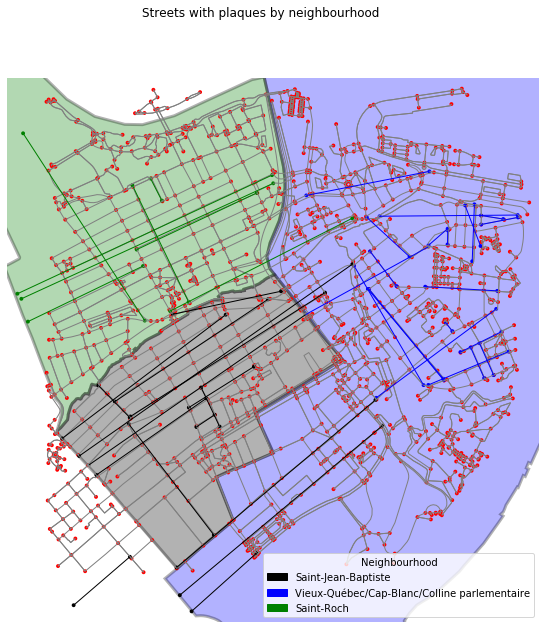

In [108]:
fig.savefig("qcGraphWithEdgesAndNeighbourhoods.png")
fig 


 